# 구글 드라이브와 연동하여 구글 드라이브에서 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

your_path = "Colab Notebooks/data_file/archive/pokemon.csv"
hdata = pd.read_csv("/content/gdrive/My Drive/" + your_path)

In [ ]:
hdata.sort_values(by='Name', inplace=True)
hdata.reset_index(inplace=True)
hdata.head()

,index,Name,Type1,Type2
0,459,abomasnow,Grass,Ice
1,62,abra,Psychic,NaN
2,358,absol,Dark,NaN
3,616,accelgor,Bug,NaN
4,680,aegislash-blade,Steel,Ghost


# 이미지 데이터 전처리 하기

In [ ]:
# 출제자는 실행 시간 5분 15초 걸림
# 출제가가 작성한 코드입니다. 코드 질문이 있다면 출제자에게 갠톡 주시면 답변드리겠습니다

import numpy as np
from PIL import Image

pokemon_img = np.empty((0, 120, 120, 3), int)
pokemon_index = np.empty((0), int)

your_img_path = '/Colab Notebooks/data_file/archive/images/images/'
path = your_img_path

for num in range(len(hdata)):
  img_name = hdata['Name'][num]

  try:
    im = Image.open(path + '%s.jpg'%(img_name))
    pix = np.array(im)

    if(pix.shape != (120, 120, 3)):
      continue
    pokemon_img = np.append(pokemon_img, np.array([pix]), axis=0)
    pokemon_index = np.append(pokemon_index, num)

  except:
    im = Image.open(path + '%s.png'%(img_name))
    pix = np.array(im)

    if(pix.shape != (120, 120, 4)):
      continue

    for row_index in range(pix.shape[0]):
      for col_index in range(pix.shape[1]):
        if pix[:, :, 3][row_index][col_index] == 0:    # png 데이터의 투명도를 나타내는 부분에서, 포켓몬 이미지를 제외한 배경의 pixel 값을 255로 바꿀 것임
          for i in range(3):
            pix[:, :, i][row_index][col_index] = 255

    pix = pix[:, :, :3] # 투명 부분 버리기
    pokemon_img = np.append(pokemon_img, np.array([pix]), axis=0)
    pokemon_index = np.append(pokemon_index, num)

pokemon_type = hdata.iloc[pokemon_index, 2]

NameError: ignored

이미지 데이터를 전처리한 결과 얻은 데이터는 아래와 같습니다<br/>
이미지 데이터: pokemon_img<br/>
타겟 데이터: pokemon_type

1. 6장의 draw_fruits 함수를 이용하여 포켓몬 사진 100개를 출력하세요  (1점)

In [ ]:
def draw_data(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')

  plt.show()

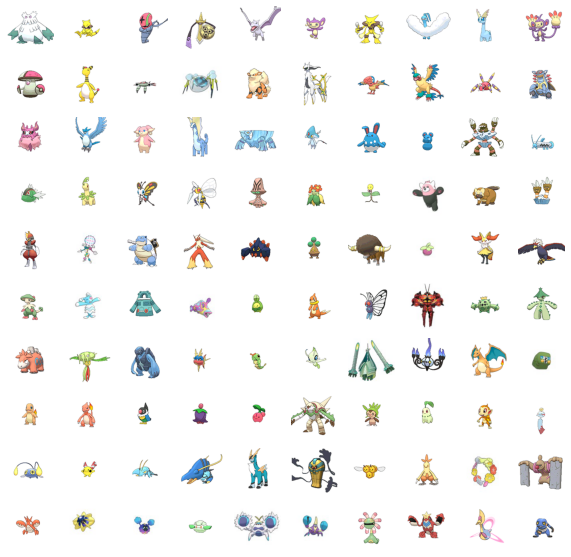

In [ ]:
import matplotlib.pyplot as plt

draw_data(pokemon_img[:100])

2. 이미지를 흑백 반전한후 포켓몬 사진 100개를 출력하세요 (2점)
- 힌트<br/>
4는 10을 빼서 6으로 바꿀 수 있다<br/>
numpy는 broadcasting 기능을 제공한다

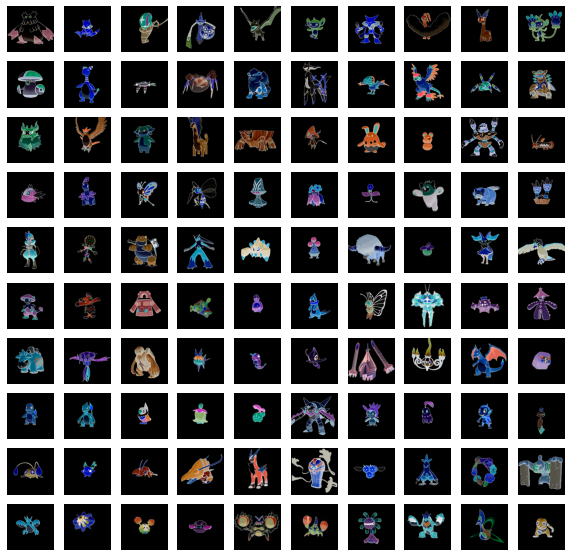

In [ ]:
pokemon_img = 255 - pokemon_img

draw_data(pokemon_img[:100])

3. 아래 지시사항을 참고하여 target을 완성하세요 (2점)
* pokemon_type 데이터에 있는 데이터 종류를 파악하고 알파벳 순으로 라벨을 '0, 1, 2,...'으로 지정하여 새로운 label을 만드세요

In [ ]:
# 타겟 라벨링
label = pokemon_type.unique()
label = np.sort(label)

In [ ]:
pokemon_target = np.empty((0), int)

for target in pokemon_type:
  pokemon_target = np.append(pokemon_target, np.where(label == target)[0][0])

# 모델 만들기

아래 지시문을 이행하여 모델을 생성, 훈련 및 평가를 진행하세요 (5점)
- scikit-learn을 이용하여 train_data와 test_data를 0.25 비율로 나누세요 (random_state는 42)
- 훈련에 사용할 이미지 데이터를 0 ~ 1사이의 값으로 바꿔주세요
- 은닉층은 1000개의 노드와 'relu'함수를 이용하여 형성해주세요
- 출력층은 'softmax' 함수를 이용하여 형성해주세요
- 손실함수는 교재에서 배운 크로스엔트로피를 사용해주세요
- epoch는 10으로 설정하고, 훈련에서 정확도가 출력되게 해주세요

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(pokemon_img, pokemon_target, random_state=42)

train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(120, 120, 3)))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 1000)              43201000  
                                                                 
 dense_1 (Dense)             (None, 18)                18018     
                                                                 
Total params: 43,219,018
Trainable params: 43,219,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
15/15 [==============================] - 7s 418ms/step - loss: 16.8511 - accuracy: 0.1247
Epoch 2/10
15/15 [==============================] - 6s 399ms/step - loss: 2.8223 - accuracy: 0.2801
Epoch 3/10
15/15 [==============================] - 6s 394ms/step - loss: 2.2419 - accuracy: 0.4004
Epoch 4/10
15/15 [==============================] - 6s 398ms/step - loss: 1.8028 - accuracy: 0.5164
Epoch 5/10
15/15 [==============================] - 6s 396ms/step - loss: 1.4031 - accuracy: 0.6346
Epoch 6/10
15/15 [==============================] - 6s 399ms/step - loss: 0.9248 - accuracy: 0.7418
Epoch 7/10
15/15 [==============================] - 6s 397ms/step - loss: 0.3854 - accuracy: 0.8972
Epoch 8/10
15/15 [==============================] - 6s 396ms/step - loss: 1.2110 - accuracy: 0.7396
Epoch 9/10
15/15 [==============================] - 6s 396ms/step - loss: 0.1701 - accuracy: 0.9562
Epoch 10/10
15/15 [==============================] - 6s 394ms/step - loss: 0.3357 - accuracy: 0.919

In [ ]:
model.evaluate(test_scaled, test_target)

5/5 [==============================] - 1s 78ms/step - loss: 7.9947 - accuracy: 0.1765


[7.994683742523193, 0.1764705926179886]